# <center> Уравнения параболического типа

### Вариант №1

### Условия:


$$\frac{\partial u}{\partial t} = a \frac{\partial^2u}{\partial x^2} +b\frac{\partial u}{\partial x} + cu,  a>0, b>0,c<0$$

$$u_x(0,t) + u(0,t) = \exp((c-a)t)(\cos(bt)+\sin(bt)),$$

$$u_x(\pi,t)+u(\pi,t) = -\exp((c-a)t)(\cos(bt)+\sin(bt)),$$

$$u(x,0) = \sin(x)$$



При аппроксимации  дифференциальных операторов получим:

$$\frac{u^{k+1}_j - u^k_j}{\tau} = a\frac{u^{k}_{j+1}-2u^{k}_j+u^{k}_{j-1}}{h^2}+b\frac{u^{k}_{j+1}-u^{k}_{j-1}}{2h}+cu^{k}_j + O(\tau+h^2)$$

При аппроксимации производных первого порядка в граничных условиях воспользуемся следующими схемами:

$$\frac{\partial u}{\partial x}|^{k+1}_{j=0} = \frac{u^{k+1}_1-u^{k+1}_0}{h}+O(h)$$

$$\frac{\partial u}{\partial x}|^{k+1}_{j=N} = \frac{u^{k+1}_N-u^{k+1}_{N-1}}{h}+O(h)$$

Тогда 



$$u^{k+1}_j = u^k_j + \frac{a\tau}{h^2}(u^{k}_{j+1}-2u^{k}_j+u^{k}_{j-1})+\frac{b\tau}{2h}(u^{k}_{j+1}-u^{k}_{j-1})+c\tau u^k_j$$

$$u_0^{k+1} = \frac{1/h}{1-1/h}u_1^{k+1} + \frac{\exp((c-a)t)(\cos(bt)+\sin(bt))}{1-1/h}$$

$$u_N^{k+1} = \frac{1/h}{1-1/h}u_{N-1}^{k+1} + \frac{-\exp((c-a)t)(\cos(bt)+\sin(bt))}{1-1/h}$$

$$u^0_j = \sin x $$

при $u^1_1 (k = 0,j = 1)$:

$$u^{1}_1 = u^0_1 + \frac{a\tau}{h^2}(u^{0}_{2}-2u^{0}_1+u^{0}_{0})+\frac{b\tau}{2h}(u^{0}_{2}-u^{0}_{0})+c\tau u^0_1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from matplotlib import rcParams
rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma', 'Comic Sans MS', 'Courier', 'Shadow'
rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Times New Roman'
#plt.style.use('seaborn')

In [2]:
def phi0(a,b,c,t): return m.exp((c-a)*t)*(m.cos(b*t)+m.sin(b*t))
def phil(a,b,c,t): return -m.exp((c-a)*t)*(m.cos(b*t)+m.sin(b*t))
def f(x): return np.sin(x)
x0 = 0
xl = m.pi
t0 = 0
tl = 1

In [5]:
def explicit(a,b,c,x0,xl,t0,tl,phi0,phil,f,N,M):
    h = (xl-x0)/N
    tau = (tl-t0)/M
    x = np.linspace(x0,xl,N)
    t = np.linspace(t0,tl,M)
    #print(len(x),'\t',len(t))
    if tau > h**2/2:
        print('tau > h**2/2!!!')
        #print('h =',h,'\ntau =',tau)
    u = np.zeros((M,N), dtype = 'float64')
    #print(np.shape(u))
    for k in range(M):
        for j in range(N):
            if k == 0:
                u[k][j] = f(x[j])
            else:
                if j == 0:
                    u[k][j] = (1/h)/(1-1/h)*u[k][j+1]+phi0(a,b,c,t[k])/(1-1/h)
                elif j == N-1:
                    u[k][j] = u[k][j] = (1/h)/(1-1/h)*u[k][j-1]+phil(a,b,c,t[k])/(1-1/h)
                else:
                    u[k][j] = u[k-1][j]+(a*tau/h**2)*(u[k-1][j+1] - 2*u[k-1][j] + u[k-1][j-1]) + (b*tau/(2*h))*(u[k-1][j+1] - u[k-1][j-1]) + c*tau*u[k-1][j]
            
    return {'u':u, 'x':x, 't': t}

In [6]:
data = explicit(0.5,0.1,-0.9,x0,xl,t0,tl,phi0,phil,f,50,600)

50 	 600
(600, 50)


(600, 50) (600, 50)
(600, 50) (600, 50)


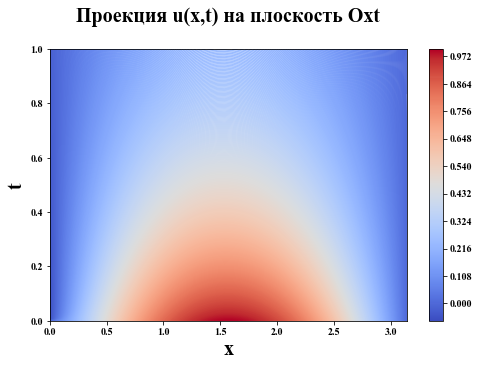

In [9]:
%matplotlib inline
from matplotlib import cm
x_arr,t_arr = np.meshgrid(data['x'],data['t'])
print(np.shape(x_arr),np.shape(t_arr))
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
x_arr,t_arr = np.meshgrid(data['x'],data['t'])
print(np.shape(x_arr),np.shape(t_arr))
cont = ax.contour(x_arr,t_arr, data['u'], 650, cmap=cm.coolwarm)
fig.colorbar(cont)
ax.set_title('Проекция u(x,t) на плоскость Oxt\n', size = 20)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('t', size = 20)
plt.show()

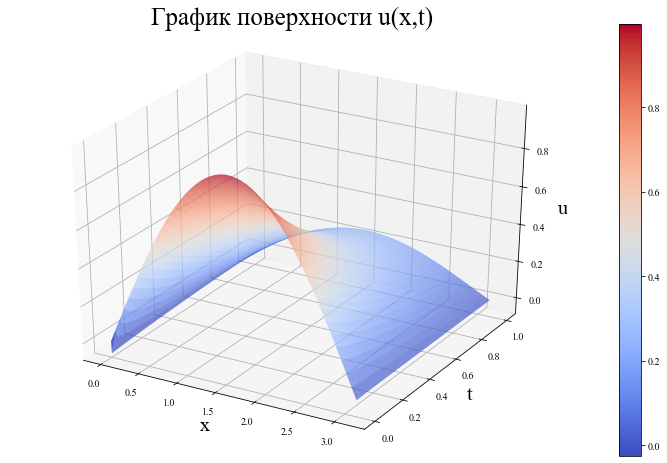

In [6]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,6))
ax = Axes3D(fig)
surf = ax.plot_surface(x_arr, t_arr, data['u'], cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_title('График поверхности u(x,t) \n', size = 25)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('t', size = 20)
ax.set_zlabel('u', size = 20)
fig.colorbar(surf)
plt.show()